In [ ]:
Decision Tree
 
Assignment


About the data: 
Let’s consider a Company dataset with around 10 variables and 400 records. 
The attributes are as follows: 
 Sales -- Unit sales (in thousands) at each location
 Competitor Price -- Price charged by competitor at each location
 Income -- Community income level (in thousands of dollars)
 Advertising -- Local advertising budget for company at each location (in thousands of dollars)
 Population -- Population size in region (in thousands)
 Price -- Price company charges for car seats at each site
 Shelf Location at stores -- A factor with levels Bad, Good and Medium indicating the quality of the shelving location for the car seats at each site
 Age -- Average age of the local population
 Education -- Education level at each location
 Urban -- A factor with levels No and Yes to indicate whether the store is in an urban or rural location
 US -- A factor with levels No and Yes to indicate whether the store is in the US or not
The company dataset looks like this: 
 
Problem Statement:
A cloth manufacturing company is interested to know about the segment or attributes causes high sale. 
Approach - A decision tree can be built with target variable Sale (we will first convert it in categorical variable) & all other variable will be independent in the analysis.  


In [ ]:
# importing libraries

In [1]:
import pandas as pd
from sklearn import preprocessing
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeRegressor

In [ ]:
# reading file

In [2]:
data=pd.read_csv('Company_Data.csv')
data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [3]:
new=pd.cut(data['Sales'],bins=[0,8.6,17],labels=['Low','High'])
new

0      High
1      High
2      High
3       Low
4       Low
       ... 
395    High
396     Low
397     Low
398     Low
399    High
Name: Sales, Length: 400, dtype: category
Categories (2, object): ['Low' < 'High']

In [4]:
data['US']=np.where(data['US'].str.contains('Yes'),1,0)
data['Urban']=np.where(data['Urban'].str.contains('Yes'),1,0)
data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,1,1
1,11.22,111,48,16,260,83,Good,65,10,1,1
2,10.06,113,35,10,269,80,Medium,59,12,1,1
3,7.40,117,100,4,466,97,Medium,55,14,1,1
4,4.15,141,64,3,340,128,Bad,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,1,1
396,6.14,139,23,3,37,120,Medium,55,11,0,1
397,7.41,162,26,12,368,159,Medium,40,18,1,1
398,5.94,100,79,7,284,95,Bad,50,12,1,1


In [5]:
data['ShelveLoc']=data['ShelveLoc'].map({'Bad':0,'Medium':1,'Good':2})
data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,0,42,17,1,1
1,11.22,111,48,16,260,83,2,65,10,1,1
2,10.06,113,35,10,269,80,1,59,12,1,1
3,7.40,117,100,4,466,97,1,55,14,1,1
4,4.15,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,2,33,14,1,1
396,6.14,139,23,3,37,120,1,55,11,0,1
397,7.41,162,26,12,368,159,1,40,18,1,1
398,5.94,100,79,7,284,95,0,50,12,1,1


In [6]:
df=data.drop(['Sales'],axis=1)
df

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,138,73,11,276,120,0,42,17,1,1
1,111,48,16,260,83,2,65,10,1,1
2,113,35,10,269,80,1,59,12,1,1
3,117,100,4,466,97,1,55,14,1,1
4,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,2,33,14,1,1
396,139,23,3,37,120,1,55,11,0,1
397,162,26,12,368,159,1,40,18,1,1
398,100,79,7,284,95,0,50,12,1,1


In [7]:
df['Sales_cat']=new
df

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales_cat
0,138,73,11,276,120,0,42,17,1,1,High
1,111,48,16,260,83,2,65,10,1,1,High
2,113,35,10,269,80,1,59,12,1,1,High
3,117,100,4,466,97,1,55,14,1,1,Low
4,141,64,3,340,128,0,38,13,1,0,Low
...,...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,2,33,14,1,1,High
396,139,23,3,37,120,1,55,11,0,1,Low
397,162,26,12,368,159,1,40,18,1,1,Low
398,100,79,7,284,95,0,50,12,1,1,Low


In [18]:
x=df.iloc[:,0:10]
y=df['Sales_cat']
y

0      0
1      0
2      0
3      1
4      1
      ..
395    0
396    1
397    1
398    1
399    0
Name: Sales_cat, Length: 400, dtype: int32

In [19]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.3,random_state=42) 

In [16]:
label=preprocessing.LabelEncoder()
df['Sales_cat']= label.fit_transform(df['Sales_cat'])

In [17]:
df

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales_cat
0,138,73,11,276,120,0,42,17,1,1,0
1,111,48,16,260,83,2,65,10,1,1,0
2,113,35,10,269,80,1,59,12,1,1,0
3,117,100,4,466,97,1,55,14,1,1,1
4,141,64,3,340,128,0,38,13,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,2,33,14,1,1,0
396,139,23,3,37,120,1,55,11,0,1,1
397,162,26,12,368,159,1,40,18,1,1,1
398,100,79,7,284,95,0,50,12,1,1,1


In [20]:
model=DecisionTreeClassifier(criterion='entropy',max_depth=4)

In [21]:
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

[Text(0.5595238095238095, 0.9, 'X[5] <= 1.5\nentropy = 0.946\nsamples = 280\nvalue = [92, 187, 1]'),
 Text(0.2619047619047619, 0.7, 'X[4] <= 105.5\nentropy = 0.836\nsamples = 224\nvalue = [54, 169, 1]'),
 Text(0.09523809523809523, 0.5, 'X[6] <= 31.0\nentropy = 0.998\nsamples = 74\nvalue = [35, 39, 0]'),
 Text(0.047619047619047616, 0.3, 'entropy = 0.0\nsamples = 9\nvalue = [9, 0, 0]'),
 Text(0.14285714285714285, 0.3, 'X[5] <= 0.5\nentropy = 0.971\nsamples = 65\nvalue = [26, 39, 0]'),
 Text(0.09523809523809523, 0.1, 'entropy = 0.276\nsamples = 21\nvalue = [1, 20, 0]'),
 Text(0.19047619047619047, 0.1, 'entropy = 0.987\nsamples = 44\nvalue = [25, 19, 0]'),
 Text(0.42857142857142855, 0.5, 'X[2] <= 13.5\nentropy = 0.605\nsamples = 150\nvalue = [19, 130, 1]'),
 Text(0.3333333333333333, 0.3, 'X[0] <= 137.5\nentropy = 0.477\nsamples = 132\nvalue = [11, 120, 1]'),
 Text(0.2857142857142857, 0.1, 'entropy = 0.201\nsamples = 96\nvalue = [3, 93, 0]'),
 Text(0.38095238095238093, 0.1, 'entropy = 0.937

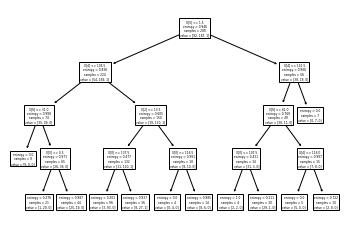

In [22]:
tree.plot_tree(model)

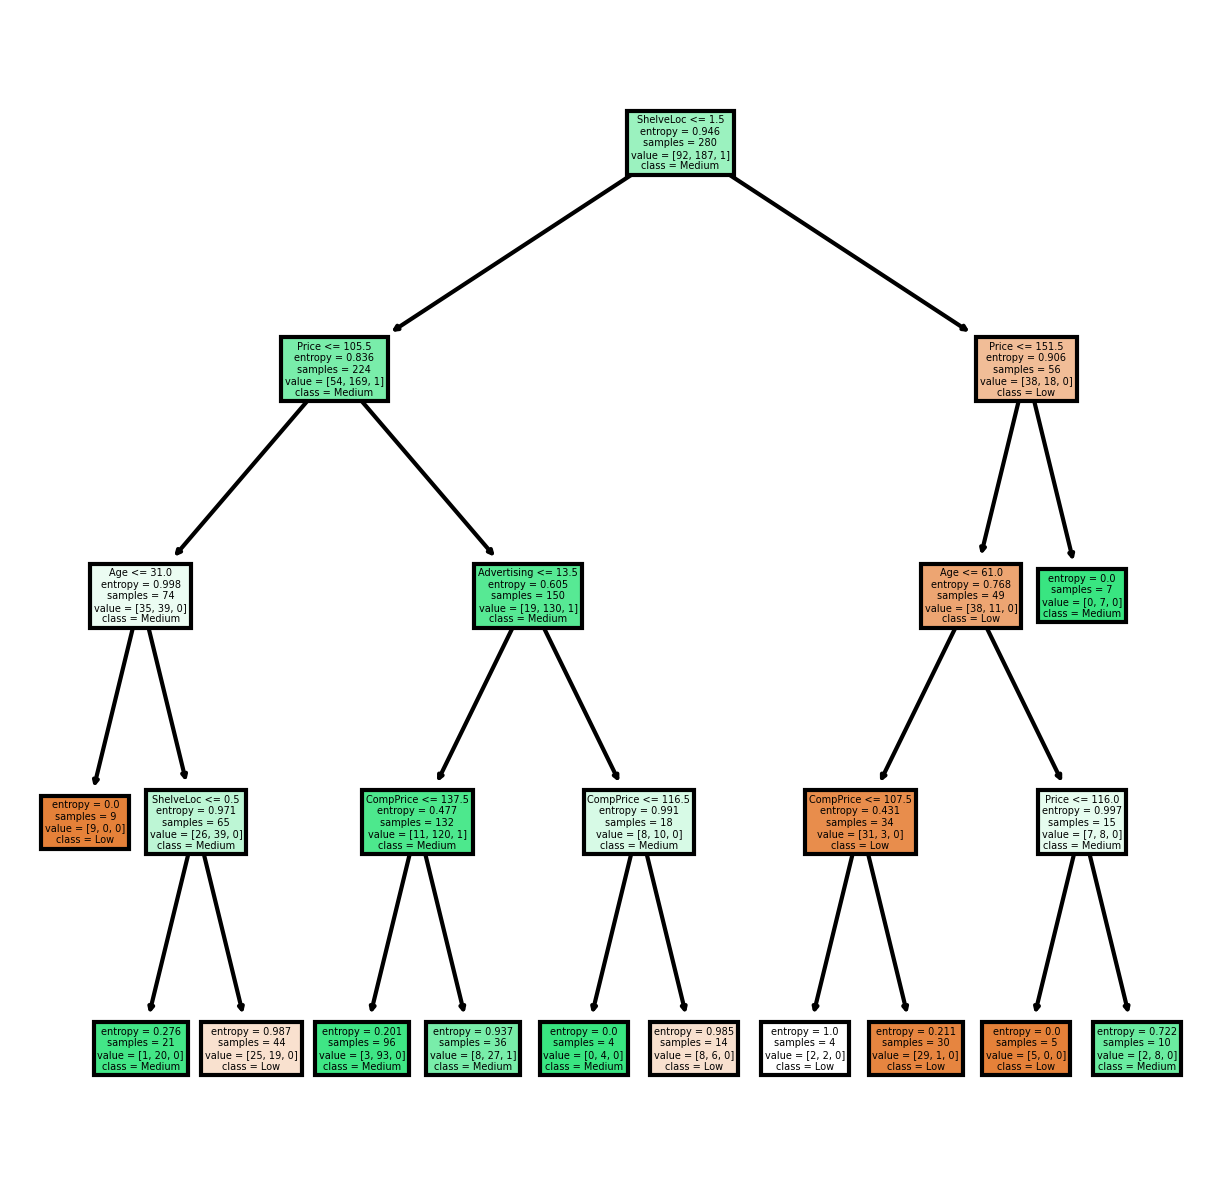

In [26]:
fn=['CompPrice','Income','Advertising','Population','Price','ShelveLoc','Age','Education','Urban','US']
cn=['Low','Medium', 'High']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (5,5), dpi=300)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [28]:
pred=model.predict(x_test)
pred

array([1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 0])

In [32]:
model.feature_importances_

array([0.13979423, 0.        , 0.07533522, 0.        , 0.33230417,
       0.30939368, 0.14317269, 0.        , 0.        , 0.        ])

In [33]:
feature_imp = pd.Series(model.feature_importances_,index=fn).sort_values(ascending=False) 
feature_imp

Price          0.332304
ShelveLoc      0.309394
Age            0.143173
CompPrice      0.139794
Advertising    0.075335
Income         0.000000
Population     0.000000
Education      0.000000
Urban          0.000000
US             0.000000
dtype: float64

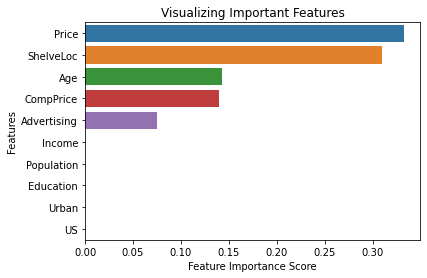

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

In [29]:
pd.crosstab(y_test,pred)

col_0,0,1
Sales_cat,,
0,36,11
1,25,48


In [31]:
np.mean(y_test==pred)

0.7

## CART

In [36]:
model1= DecisionTreeClassifier(criterion = 'gini',max_depth=4)
model1.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=4)

In [37]:
preds=model1.predict(x_test)
preds

array([1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 0])

In [38]:
model1.feature_importances_

array([0.06592933, 0.09872173, 0.06336162, 0.03029944, 0.27499823,
       0.29493085, 0.1505714 , 0.0211874 , 0.        , 0.        ])

In [39]:
pd.crosstab(y_test,preds)

col_0,0,1
Sales_cat,,
0,29,18
1,11,62


In [40]:
np.mean(y_test==preds)

0.7583333333333333

In [41]:
feature_imp1= pd.Series(model1.feature_importances_,index=fn).sort_values(ascending=False) 
feature_imp1

ShelveLoc      0.294931
Price          0.274998
Age            0.150571
Income         0.098722
CompPrice      0.065929
Advertising    0.063362
Population     0.030299
Education      0.021187
Urban          0.000000
US             0.000000
dtype: float64

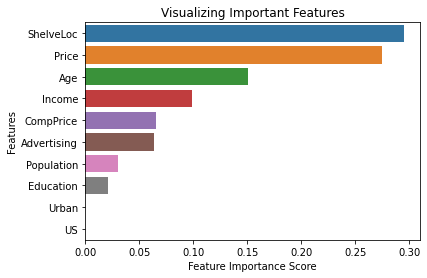

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.barplot(x=feature_imp1, y=feature_imp1.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

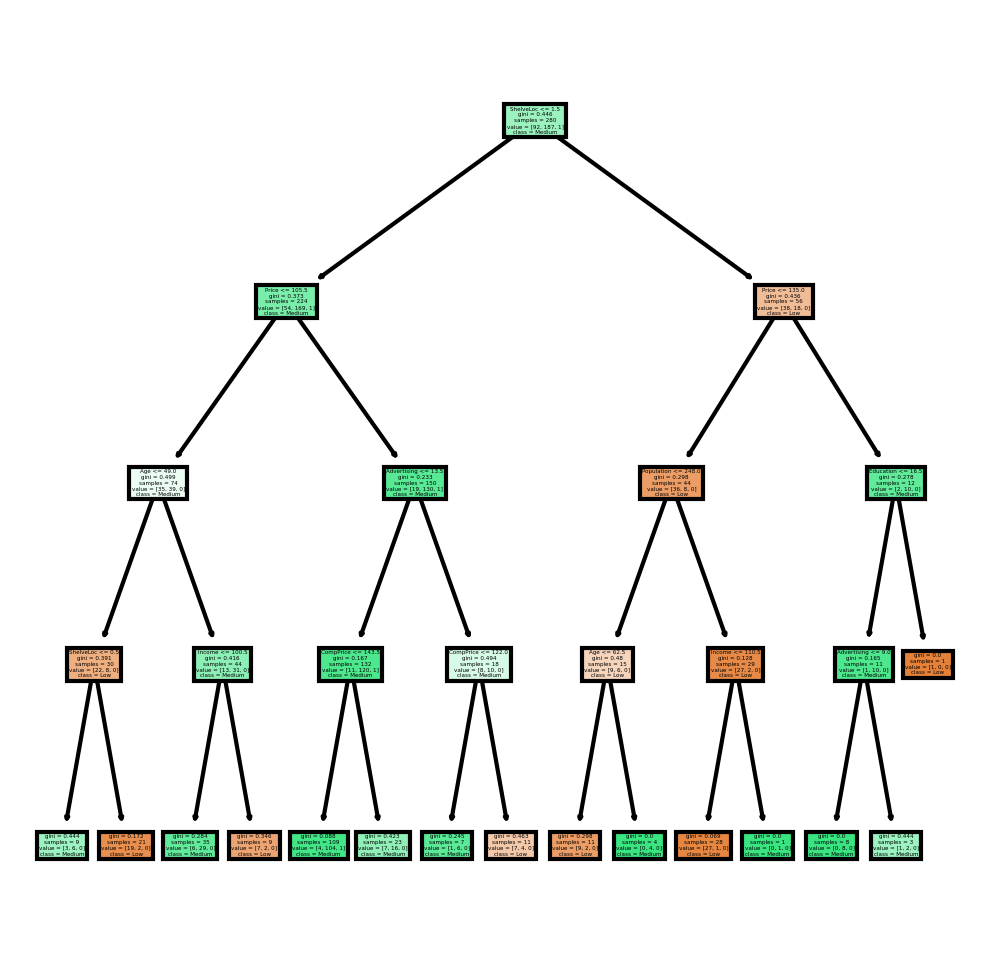

In [44]:
fn=['CompPrice','Income','Advertising','Population','Price','ShelveLoc','Age','Education','Urban','US']
cn=['Low','Medium', 'High']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model1,
               feature_names = fn, 
               class_names=cn,
               filled = True);

## CART(Regression)

In [45]:
array=df.values
array

array([[138,  73,  11, ...,   1,   1,   0],
       [111,  48,  16, ...,   1,   1,   0],
       [113,  35,  10, ...,   1,   1,   0],
       ...,
       [162,  26,  12, ...,   1,   1,   1],
       [100,  79,   7, ...,   1,   1,   1],
       [134,  37,   0, ...,   1,   1,   0]], dtype=int64)

In [46]:
X=array[:,0:4]
Y=array[:,5]
X

array([[138,  73,  11, 276],
       [111,  48,  16, 260],
       [113,  35,  10, 269],
       ...,
       [162,  26,  12, 368],
       [100,  79,   7, 284],
       [134,  37,   0,  27]], dtype=int64)

In [47]:
Y

array([0, 2, 1, 1, 0, 0, 1, 2, 1, 1, 0, 2, 1, 2, 2, 1, 2, 2, 2, 1, 1, 2,
       1, 1, 0, 2, 2, 1, 0, 0, 2, 1, 2, 2, 1, 1, 2, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 2, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 2, 1, 2, 1, 1, 2, 1, 0, 1, 1, 1, 0, 0, 2, 2, 0, 0, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 0, 1, 2, 0, 2, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 2, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 2, 2, 1, 2, 1, 0, 0, 1, 1,
       2, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 2, 1, 0, 2, 1, 1, 2, 2, 2, 1,
       1, 1, 2, 1, 2, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 2, 1, 2, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 2,
       1, 1, 1, 1, 1, 0, 2, 1, 0, 1, 0, 1, 2, 1, 2, 1, 1, 1, 2, 0, 1, 1,
       1, 1, 1, 2, 0, 0, 1, 0, 2, 0, 1, 1, 2, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       2, 0, 2, 0, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 0, 2, 2, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 2, 2, 2, 1, 2, 0, 2, 1, 1,

In [48]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [59]:
model2=DecisionTreeRegressor(max_depth=4)
model2.fit(X_train,Y_train)

DecisionTreeRegressor(max_depth=4)

In [60]:
model2.score(X_train,Y_train)

0.1701154391798767

In [61]:
model2.score(X_test,Y_test)

-0.14670449221997783